In [1]:
from all import *

First attempt: ITRE

In [12]:
splitdata = acquireSplitData()
itre_members = getImportantCommitteeMembers(comm="ITRE")

In [13]:
ourmeps = set(itre_members)

In [31]:
months = []
for month in splitdata:
    # super complicated but works...
    # ez egy szenvedés volt
    nxgraph = nx.Graph()
    nxgraph.add_nodes_from(ourmeps)
    # all nodes, no edges
    month2 = month.loc[month["MEPName"].isin(ourmeps)]
    pdedgelist = nx.from_pandas_edgelist(month2, source='AmendmentID', target='MEPName')
    ourmepsthismonth = set(ourmeps) & set(pdedgelist.nodes)
    month3 = nx.algorithms.bipartite.projected_graph(pdedgelist, ourmepsthismonth)
    nxgraph = nx.compose(nxgraph, month3)
    # end result: nxgraph is the monthly graph containing EVERY MEP from ITRE
    months.append(nxgraph)

Our measure of cohesiveness will be a percentage of how many edges are present inside the group out of the possible `n choose 2` edges.

In [32]:
# takes long ????

monthly_cohesiveness_by_party = []
for month in months:
    curr = {}
    monthly_meps = set(projected_graph) & set(pd.unique(month.nodes))
    for party in listPoliticalGroups():
        partymeps = set(listMEPs_by_polgroup(party)) & monthly_meps
        curr[party] = cohesiveness(month, partymeps)
    monthly_cohesiveness_by_party.append(curr)
monthly_cohesiveness_by_party = pd.DataFrame(monthly_cohesiveness_by_party)
print(monthly_cohesiveness_by_party)
#monthly cohesiveness by party for ITRE (!)


         EPP       ECR        ID  Greens/EFA        RE       S&D        NI  \
0   0.002262  0.000000  0.004329    0.000000  0.000000  0.006342  0.000000   
1   0.000000  0.004762  0.004329    0.000000  0.000000  0.000000  0.000000   
2   0.000754  0.000000  0.000000    0.000000  0.007389  0.003171  0.000000   
3   0.046003  0.023810  0.008658    0.003623  0.201970  0.127907  0.060606   
4   0.002262  0.000000  0.004329    0.014493  0.120690  0.132135  0.060606   
5   0.000000  0.004762  0.000000    0.003623  0.014778  0.040169  0.000000   
6   0.008296  0.014286  0.038961    0.007246  0.027094  0.038055  0.060606   
7   0.010558  0.014286  0.017316    0.003623  0.034483  0.079281  0.015152   
8   0.009804  0.000000  0.012987    0.000000  0.049261  0.115222  0.000000   
9   0.024133  0.004762  0.008658    0.007246  0.214286  0.058140  0.045455   
10  0.128205  0.138095  0.034632    0.010870  0.209360  0.247357  0.060606   
11  0.228507  0.014286  0.203463    0.010870  0.394089  0.208245

In [34]:
monthly_cohesiveness_by_country = []
for month in months:
    curr = {}
    monthly_meps = set(ourmeps) & set(pd.unique(month.nodes))
    for country in listCountries():
        countrymeps = set(listMEPs_by_country(country)) & monthly_meps
        H = nx.induced_subgraph(month, countrymeps)
        n = H.number_of_nodes()
        e = H.number_of_edges()
        if n in [0,1]:
            curr[country] = 0
        else:
            curr[country] = (2*e)/(n*(n-1)) ## proportion of edges
    monthly_cohesiveness_by_country.append(curr)
monthly_cohesiveness_by_country = pd.DataFrame(monthly_cohesiveness_by_country)
print(monthly_cohesiveness_by_country)

     Czechia    Poland    France  Netherlands  Slovakia   Romania     Spain  \
0   0.000000  0.000000  0.000000     0.000000  0.000000  0.000000  0.065934   
1   0.000000  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000     0.000000  0.000000  0.000000  0.010989   
3   0.000000  0.015152  0.019763     0.000000  0.000000  0.000000  0.043956   
4   0.000000  0.015152  0.015810     0.022222  0.000000  0.000000  0.076923   
5   0.000000  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.015152  0.011858     0.022222  0.000000  0.000000  0.021978   
7   0.000000  0.045455  0.011858     0.000000  0.166667  0.088889  0.000000   
8   0.000000  0.000000  0.003953     0.000000  0.166667  0.022222  0.032967   
9   0.000000  0.015152  0.011858     0.000000  0.666667  0.000000  0.076923   
10  0.066667  0.242424  0.019763     0.000000  0.166667  0.111111  0.120879   
11  0.000000  0.015152  0.047431     0.000000  0.000

In [6]:
monthly_cohesiveness_by_party.to_csv("results/monthly_cohesiveness_by_party.csv")
monthly_cohesiveness_by_country.to_csv("results/monthly_cohesiveness_by_country.csv")

TODO: create nice-looking diagrams of this

TODO: do the same analysis on a per country basis

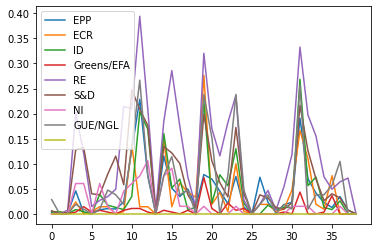

In [35]:
monthly_cohesiveness_by_party.plot()
plt.show()

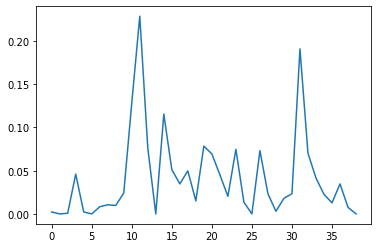

In [36]:
monthly_cohesiveness_by_party["EPP"].plot()
plt.show()

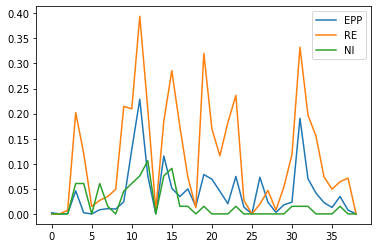

In [37]:
monthly_cohesiveness_by_party[["EPP", "RE", "NI"]].plot()
plt.show()

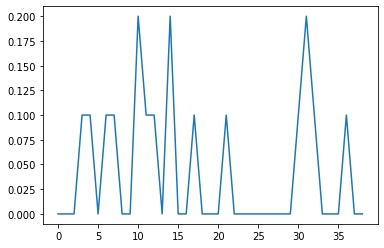

In [40]:
monthly_cohesiveness_by_country["Hungary"].plot()
plt.show()

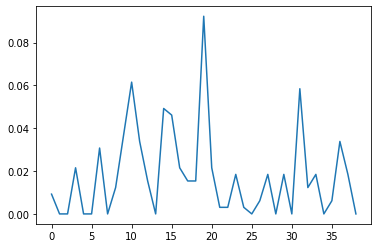

In [41]:
monthly_cohesiveness_by_country["Germany"].plot()
plt.show()

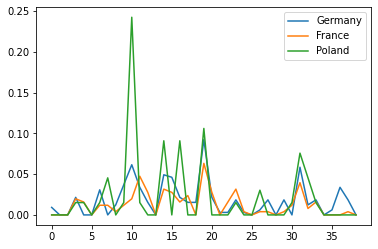

In [42]:
monthly_cohesiveness_by_country[["Germany", "France", "Poland"]].plot()
plt.show()

valami történt 2020 szeptemberben...
meg 2021 augusztusban